<a href="https://colab.research.google.com/github/jusscarrascosa/imageprocessing/blob/main/mammography_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mammographic image processing using Python and OpenCV**


In this project, I worked on mammographic image processing using Python and OpenCV. The goal was to preprocess, align, and compare two mammograms through grayscale conversion, geometric transformations, and pixel-level difference analysis. These steps are essential in medical imaging workflows, where precise alignment and comparison can assist diagnostic tasks and research in computer-aided detection.


---

*En este proyecto trabajé con el procesamiento de imágenes mamográficas utilizando Python y OpenCV. El objetivo fue preprocesar, alinear y comparar dos mamografías mediante conversión a escala de grises, transformaciones geométricas y análisis de diferencias a nivel de píxel. Estos pasos son fundamentales en flujos de trabajo de imágenes médicas, donde la alineación precisa y la comparación son clave para tareas de diagnóstico e investigación en sistemas de detección asistida por computadora.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import rotate


The first step consisted of loading the two mammography images and converting them into grayscale. This simplifies the data representation and focuses the analysis on tissue density and structure rather than color information. After visualization, I performed a basic comparative analysis based on size, orientation, and grayscale distribution.

Upon inspection, both images present different dimensions along the vertical axis (y). Additionally, Mamo1 is vertically oriented, while Mamo2 appears rotated by approximately 45°. Differences in grayscale intensity distribution are also noticeable, which may reflect variations in breast tissue density or acquisition parameters.


---



*El primer paso consistió en cargar las dos mamografías y convertirlas a escala de grises. Esto simplifica la representación de datos y centra el análisis en la densidad y estructura del tejido, en lugar de la información de color. Luego de la visualización, realicé un análisis comparativo básico considerando el tamaño, la orientación y la distribución de intensidades en escala de grises.*

*Al observarlas, ambas imágenes presentan dimensiones distintas en el eje vertical (y). Además, Mamo1 está orientada verticalmente, mientras que Mamo2 muestra una rotación de aproximadamente 45°. También se evidencian diferencias en la distribución de intensidades, posiblemente asociadas con variaciones en la densidad del tejido mamario o en los parámetros de adquisición.*

In [ ]:
Mamo1=cv2.imread('Mamo1.png',0)
Mamo2=cv2.imread('Mamo2.png',0)

Las dimensiones de la mamografia 1 son (2900, 1200)
Las dimensiones de la mamografia 2 son (1000, 1200)


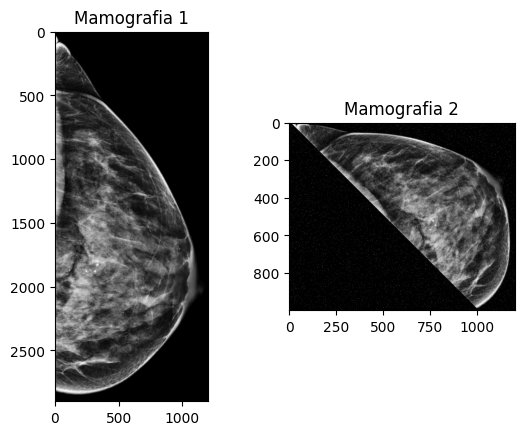

In [ ]:
print('Las dimensiones de la mamografia 1 son', Mamo1.shape)
print('Las dimensiones de la mamografia 2 son', Mamo2.shape)
fig, axs = plt.subplots (1,2)
axs[0].imshow(Mamo1, cmap='gray')
axs[0].set_title('Mamografia 1')
axs[1].imshow(Mamo2, cmap='gray')
axs[1].set_title('Mamografia 2')
plt.show()


To enable a pixel-by-pixel comparison, it was necessary to geometrically transform Mamo2 so that it matches the size and orientation of Mamo1. Several approaches were tested to achieve this transformation without significant information loss. The chosen method involved rotating the image around the pixel (0,0) while enlarging the canvas to twice its original size, thus preserving the image content.

Following the rotation, the resulting image was significantly larger, so I applied a zoom crop to focus on the relevant region. Finally, I used a resize operation to match the dimensions of Mamo1, ensuring direct spatial correspondence for subsequent analysis.


---


*Para poder realizar una comparación píxel a píxel, fue necesario transformar geométricamente Mamo2 de modo que coincidiera en tamaño y orientación con Mamo1. Probé varios enfoques hasta lograr una transformación sin pérdida significativa de información. El método elegido consistió en rotar la imagen alrededor del píxel (0,0) y ampliar el lienzo al doble de su tamaño original, lo que permitió conservar el contenido completo.*

*Después de la rotación, la imagen resultante era considerablemente más grande, por lo que apliqué un recorte con zoom para centrarme en la región de interés. Finalmente, utilicé una operación de resize para igualar las dimensiones de Mamo1, asegurando así una correspondencia espacial directa para el análisis posterior.*

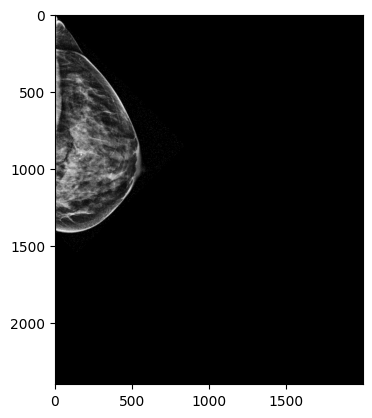

In [ ]:
Mamo2=cv2.imread('Mamo2.png',0)
ancho, alto = Mamo2.shape
matriz_rotacion = cv2.getRotationMatrix2D((0,0), -45, 1)
mamo2_rotada = cv2.warpAffine(Mamo2, matriz_rotacion, (ancho*2, alto*2))
plt.imshow(mamo2_rotada, cmap='gray')
plt.show()

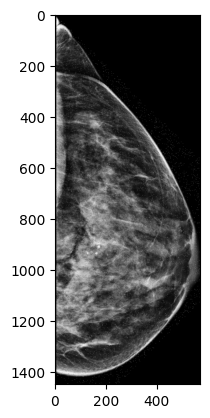

In [ ]:
zoommamo2= mamo2_rotada[0:1450, 0:570]
plt.imshow(zoommamo2, cmap='gray')
plt.show()

Las dimensiones de la Mamografia despues de transformarla son (2900, 1200) . Diferentes a la de la Mamografia 2 original que era (1000, 1200)


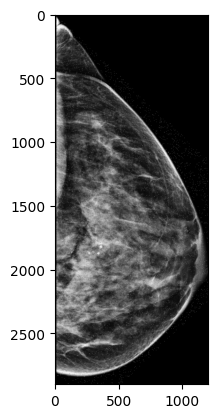

In [ ]:
mamo2actual=cv2.resize(zoommamo2,(1200,2900))
print('Las dimensiones de la Mamografia despues de transformarla son', mamo2actual.shape, '. Diferentes a la de la Mamografia 2 original que era', Mamo2.shape)
plt.imshow(mamo2actual, cmap='gray')
plt.show()


As an optional step, I calculated the difference image between the two mammograms on a pixel-by-pixel basis. The absolute difference was used to avoid negative intensity values, allowing a more interpretable visualization. In the resulting heatmap, regions with low difference (darker colors) indicate high similarity between the two images, while high-intensity areas (bright spots) highlight significant structural differences.

Notably, several bright regions can be seen around the periphery of Mamo2, suggesting structural variations or artifacts not present in Mamo1. This technique is valuable in medical imaging, as it helps identify subtle changes in tissue structures or discrepancies caused by positioning and acquisition conditions.


---


*Como paso opcional, calculé la imagen diferencia entre las dos mamografías píxel a píxel. Utilicé la diferencia absoluta para evitar valores negativos de intensidad, lo que permite una visualización más fácil de interpretar. En el mapa de calor resultante, las regiones con baja diferencia (colores oscuros) indican alta similitud entre ambas imágenes, mientras que las áreas de alta intensidad (puntos brillantes) resaltan diferencias estructurales significativas.*

*Se pueden observar varias zonas brillantes alrededor del contorno de Mamo2, lo que sugiere variaciones estructurales o artefactos que no están presentes en Mamo1. Esta técnica es especialmente útil en imágenes médicas, ya que permite detectar cambios sutiles en las estructuras del tejido o discrepancias causadas por la posición y las condiciones de adquisición.*

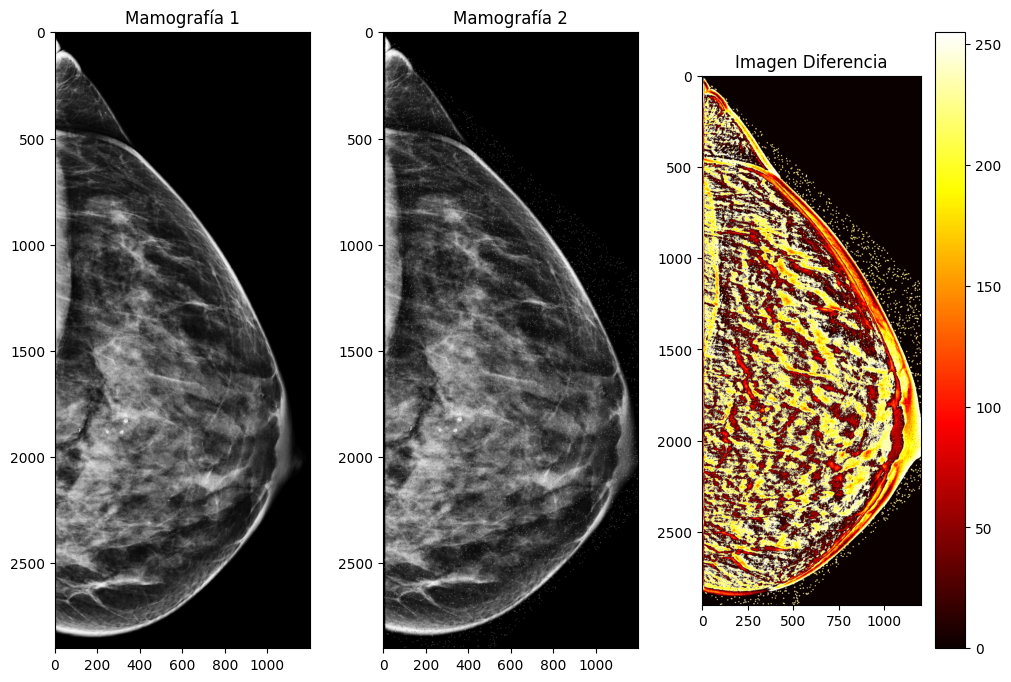

In [ ]:

imagen_diferencia = abs(Mamo1-mamo2actual)
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title("Mamografía 1")
plt.imshow(Mamo1, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Mamografía 2")
plt.imshow(mamo2actual, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Imagen Diferencia")
plt.imshow(imagen_diferencia, cmap='hot')
plt.colorbar()
plt.show()


This project demonstrates fundamental image processing techniques applied to mammography: grayscale conversion, geometric alignment, and difference analysis. These steps form the basis for more advanced applications, such as automated lesion detection or longitudinal comparison of medical images. They also highlight the importance of precise preprocessing in ensuring reliable diagnostic support tools.


---


*Este proyecto demuestra técnicas fundamentales de procesamiento de imágenes aplicadas a mamografías: conversión a escala de grises, alineación geométrica y análisis de diferencias. Estos pasos constituyen la base de aplicaciones más avanzadas, como la detección automática de lesiones o la comparación longitudinal de imágenes médicas. También resaltan la importancia de un preprocesamiento preciso para garantizar herramientas de apoyo al diagnóstico confiables.*